# Melbourne City Data
## Urban forest and Demographic aspects
**02806: Social Data Analysis and Visualization**  
*Date: 10-05-2022*  

<ins>Students</ins>:
* Gian Marco Grieco (s202893)  
* Maria Pia Macedo (s202684)  
* Vera Nijmeijer (s213011)


### Motivation
The main dataset we chose for our final project is a dataset containing information about all trees in Melbourne with regard to the location of the trees, when they were planted and more. We combined this dataset with a few more datasets for a more thorough analysis of the city of Melbourne. These datasets are a dataset containing information about the temperature in different locations of the city, a dataset containing the locations of facilities in the city and a dataset containing demographic information about Melbourne. We chose these datasets to show the urban forest in Melbourne and to show the impact of the trees on the citizens of Melbourne.

The goal for the end user's experience is to get an overview of where trees are located in Melbourne and what type of trees there are. On top of that we wanted to examine what the impact is of having trees in the city.One of the things we wanted to examine is if there was a connection between the number of trees in an area and the temperature to see if more trees lead to a lower temperature. We also looked at facilities in the city, to see if there is a difference in the number of trees surrounding certain types of facilities. A demographic aspect was also added to the research to examine the relationship between the number of trees planted in certain neighbourhoods and the demographic aspects of that neighbourhood.

### Genre

This narrative visualization adopts the Magazine Style genre, since it makes use of text as figures complement to link them and tell a story. Although this genre is mostly used to display static visualizations, dynamic visualizations, such as HeatMapWithTime and hovering tools are also used with the aim of enhancing the reader interaction with the data story. \
\
From the three categories of Visual Narrative (Figure 7 in Segal and Heer) \
_Visual Structuring_, a consistent visual platform strategy characterize the third section "Demographic perspective", the same structure made by bar chart and choropleth map holds for the entire analysis. Furthermore, progress bars are used along with some of the visualizations in the project. \
In the same section as well as in the first named "Tree Presentation", animated transitions, from the *Transition Guidance* category, present the development of the situation across the years without disorienting the viewer. \
Finally, no tools are adopted from the _Highlights_ category.

From the three categories of Narrative Structure (Figure 7 in Segal and Heer) \
A linear _Ordering_ is followed as the project's structure consists on an introduction to several tree features, a prediction of the trees Life Expectancy, an investigation of the impact of trees on temperature and health and finally a last section that looks into demographic aspects related to the tree distribution. \
Regarding *Interactivity*, hover highlighting is used in the section "Demographic perspective". \
Finally, many tools from the _Messaging_ category are utilized over all the different sections due to the chosen genre for this project, such as captions or headlines, introductory text and summary or synthesis accompany the figures.

**INITIAL IMPORTS**

In [243]:
import pandas as pd
import geopandas as gpd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import timedelta
import datetime
import matplotlib.pyplot as plt
import branca
import branca.colormap as cm
from folium.features import DivIcon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


### Tree Presentation

In [244]:
dftrees = pd.read_csv("Trees_ds.csv", parse_dates=True)

*Data set columns explained*

*Source: https://data.melbourne.vic.gov.au/Environment/Trees-with-species-and-dimensions-Urban-Forest-/fp38-wiyy*

*Data Last Updated: September 30, 2021*


>    1. `CoM ID`: City of Melbourne's unique asset ID;
>    2. `Common Name`: xx;
>    3. `Scientific Name`:
>    4. `Genus`: 170 genus
>    5. `Family`:
>    6. `Diameter Breast Height`: Diameter at breast height, or DBH, is a standard method of expressing the diameter of the trunk or bole of a standing tree. City of Melbourne Measures this 1.4m from ground level. 0.00 = Not yet assessed;
>    7. `Year Planted`: This is generally accurate for trees planted from 2003 onwards, prior to 2003 this indicate the date the trees are added to the inventory (Data enteries for 20 years);
>    8. `Date Planted`: This is generally accurate for trees planted from 2003 onwards, prior to 2003 this indicate the date the trees are added to the inventory;
>    9. `Age Description`: Based on Date planted / date of data entry therefore sometimes inaccurate Null value = Not yet assessed;
>    10. `Useful Life Expectency`: The trees useful life expectancy. Last updated in 2009 Null value = Not yet assessed;
>    11. `Useful Life Expectency Value`: Useful Life Expectency Value, derive from the Useful Life Expectency column, displayed as an integer;
>    12. `Precinct`: The neighbourhood boundary defined for tree planning purposes;
>    13. `Located in`: This descibes whether a tree is located within a public park or along a street; The data set has 46987 trees located in parks, 29939 located in the street.
>    14. `UploadDate`:
>    15. `CoordinateLocation`:
>    16. `Latitude`:
>    17. `Longitude`:
>    18. `Easting`: Easting Coordinate, please use MGA94-55;
>    19. `Northing`: Northing Coordinate, please use MGA94-55.

**BASIC STATS ON TREES DATASET**

In [47]:
#MISSING DATA
#number of null values per columnin trees dataframe
dftrees[dftrees.columns].isna().sum()

CoM ID                              0
Common Name                        25
Scientific Name                     1
Genus                               1
Family                              1
Diameter Breast Height          51942
Year Planted                        0
Date Planted                        0
Age Description                 51959
Useful Life Expectency          51959
Useful Life Expectency Value    51959
Precinct                        76928
Located in                          2
UploadDate                          0
CoordinateLocation                  0
Latitude                            0
Longitude                           0
Easting                             0
Northing                            0
dtype: int64

In [245]:
#drop useless columns
dftrees = dftrees.drop(
    columns=['UploadDate', 'CoordinateLocation', 'Easting', 'Northing', 'Precinct'])

In [246]:
dftrees.describe()

,CoM ID,Diameter Breast Height,Year Planted,Useful Life Expectency Value,Latitude,Longitude
count,7.692800e+04,24986.000000,76928.000000,24969.000000,76928.000000,76928.000000
mean,1.363416e+06,37.765789,2000.099366,38.331331,-37.801498,144.951519
std,2.942593e+05,31.589098,30.687379,25.066325,0.016349,0.018725
min,1.013381e+06,0.000000,1899.000000,1.000000,-37.850532,144.900450
25%,1.048410e+06,14.000000,1998.000000,20.000000,-37.814540,144.942945
50%,1.455318e+06,29.000000,2010.000000,30.000000,-37.797001,144.951331
75%,1.605108e+06,56.000000,2015.000000,60.000000,-37.788961,144.963222
max,1.811826e+06,347.000000,2021.000000,80.000000,-37.775511,144.991056


In following visualization we will only be ineterst in trees planted after 2003 as the data is said to be accurate for that year onwards.

In [247]:
dftrees = dftrees.drop(dftrees[dftrees['Year Planted'] < 2003].index)

**NULL values**

Filter out that one row without NAme, Genus and Family

In [248]:
dftrees = dftrees[dftrees['Genus'].notnull()==True]

Populate as much as possible columns 'Age Description', 'Diameter Breast Height' and 'Useful Life Expectency Value' with mode of remainig rows with the same 'Scientific Name'  and planted in the same year.

In [249]:
#column 'Age Description'
dfmode = dftrees.groupby(['Scientific Name', 'Year Planted'])['Age Description'].apply(pd.Series.mode)
dfmode = dfmode.reset_index(['Scientific Name', 'Year Planted'])
dfmode.rename(columns = {'Age Description' : 'Mode Age Description'}, inplace = True)
dftrees = pd.merge(dftrees, dfmode,  how='left', left_on=['Scientific Name', 'Year Planted'], right_on = ['Scientific Name', 'Year Planted'])

#column 'Diameter Breast Height'
dfmode1 = dftrees.groupby(['Scientific Name', 'Year Planted'])['Diameter Breast Height'].apply(pd.Series.mode)
dfmode1 = dfmode1.reset_index(['Scientific Name', 'Year Planted'])
dfmode1.rename(columns = {'Diameter Breast Height' : 'Mode Diameter Breast Height'}, inplace = True)
dftrees = pd.merge(dftrees, dfmode1,  how='left', left_on=['Scientific Name', 'Year Planted'], right_on = ['Scientific Name', 'Year Planted'])

#column 'Useful Life Expectency Value'
dfmode2 = dftrees.groupby(['Scientific Name', 'Year Planted'])['Useful Life Expectency Value'].apply(pd.Series.mode)
dfmode2 = dfmode2.reset_index(['Scientific Name', 'Year Planted'])
dfmode2.rename(columns = {'Useful Life Expectency Value' : 'Mode Useful Life Expectency Value'}, inplace = True)
dftrees = pd.merge(dftrees, dfmode2,  how='left', left_on=['Scientific Name', 'Year Planted'], right_on = ['Scientific Name', 'Year Planted'])

In [250]:
dftrees['Age Description'] = dftrees['Age Description'].fillna(dftrees['Mode Age Description'])
dftrees['Diameter Breast Height'] = dftrees['Diameter Breast Height'].fillna(dftrees['Mode Diameter Breast Height'])
dftrees['Useful Life Expectency Value'] = dftrees['Useful Life Expectency Value'].fillna(dftrees['Mode Useful Life Expectency Value'])
dftrees['Useful Life Expectency'] = dftrees['Useful Life Expectency'].fillna(dftrees['Mode Useful Life Expectency Value'])
dftrees = dftrees.drop('Mode Age Description', 1)
dftrees = dftrees.drop('Mode Diameter Breast Height', 1)
dftrees = dftrees.drop('Mode Useful Life Expectency Value', 1)

In [251]:
dftrees[dftrees.columns].isna().sum()

CoM ID                              0
Common Name                        23
Scientific Name                     0
Genus                               0
Family                              0
Diameter Breast Height          36942
Year Planted                        0
Date Planted                        0
Age Description                 37233
Useful Life Expectency          37233
Useful Life Expectency Value    37233
Located in                          2
Latitude                            0
Longitude                           0
dtype: int64

**ANALYSIS**

**Introduction** 

Trees play a decisive role for both the population and the planet. 
It has been demonstrated in various [studies](https://nph.onlinelibrary.wiley.com/doi/epdf/10.1002/ppp3.39) that the presence of trees and nature in the cities can improve the community's mental health, youngster's attention span, and therefore their test scores, and beyond.

Cities must consider trees in their plans to reach sustainability goals. Trees cool our urban centers and provide benefits that can lead cities to tackle 15 out of 17 SDG - Sustainable development goals - globally supported by the United Nations.

In this project, we will explore Melbourne city's urban forest, and try to take some conclusions on how it influences or is influenced by demographic aspects.

**TREES LOC AND ITS MATURITY INFLUENCE**

The City of Melbourne currently maintains more than 70,000 trees planted all around the urban space, however, we only have cleaned, and accurate data for nearly 54,000, and therefore only this number of trees will be considered over the entire analysis. 
Since 2003, due to the 'Melbourne's Urban Forest project, different types of trees were planted slowly covering the city with green areas as we can see in the video below.


In [56]:
#Trees city coverage by year (cumulative sum)

mn_y = 2003
mx_y = dftrees['Year Planted'].max()

map = folium.Map(location=[-37.8136, 144.9631], 
                        tiles = "Stamen Toner",  zoom_start = 12.5)

# Ensure you're handing it floats
heat_df = dftrees.copy()
heat_df['Y'] = dftrees['Latitude'].astype(float) # latitude
heat_df['X'] = dftrees['Longitude'].astype(float) # longitude


# Filter the DF for rows, then columns, then remove NaNs
heat_df = heat_df[['Y', 'X']]

# Create weight column, using date
heat_df['Weight_y'] = dftrees['Year Planted']
heat_df['Weight_y'] = heat_df['Weight_y'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Y','X', 'Weight_y'])

# List comprehension to make out list of lists
heat_data = [[[row['Y'],row['X']] for index, row in heat_df[heat_df['Weight_y'] <= i].iterrows()] 
            for i in range(int(mn_y),int(mx_y)+1)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8, radius=4) # change colors with 'gradient'
                                                                            # and change the index into years
hm.add_to(map)

map.save('tree-coverage-cumsum.html')

# Display the map
map

CellOutputSizeError: The block's output is too large.

In [57]:
len(dftrees)

53938

In [58]:
len(dftrees[dftrees['Age Description'].notnull()==False])

37233

The trees can be categorized depending on their age description. Therefore these can be either 'New', 'Juvenile', 'Semi-mature', 'Mature' or 'Over-mature' based on the date they were planted. However, some of the trees in the data set have an inaccurate age description and won't be considered when analyzing this characteristic. Hence, 37,000 trees will be taken into consideration in further analysis when considering this categorization.

In [59]:
#In this visualization we are only considering trees with not null value 
#for Age description
dftrees2 = dftrees[dftrees['Age Description'].notna()]

In [60]:
dftrees2['Age in years']=[2012 - i for i in dftrees2['Year Planted']] 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
#new column for color assignment on scatter plot
dftrees2['Age Description code']=[5 if i=='New' else 4 if i=='Juvenile' else 3 if i=='Semi-Mature' else 2 if i=='Mature' else 1 if i=='Over-mature' else 'other' for i in dftrees2['Age Description'] ]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In the following visualization, one can get a perspective of where are the more mature trees planted, as well as the newest ones. The darker the dots are, the more mature a tree is. When compared with the video above, it can be seen that the most developed trees are located in the oldest part of the city (left side) that nowadays are not more densely populated by trees than other surrounding areas.


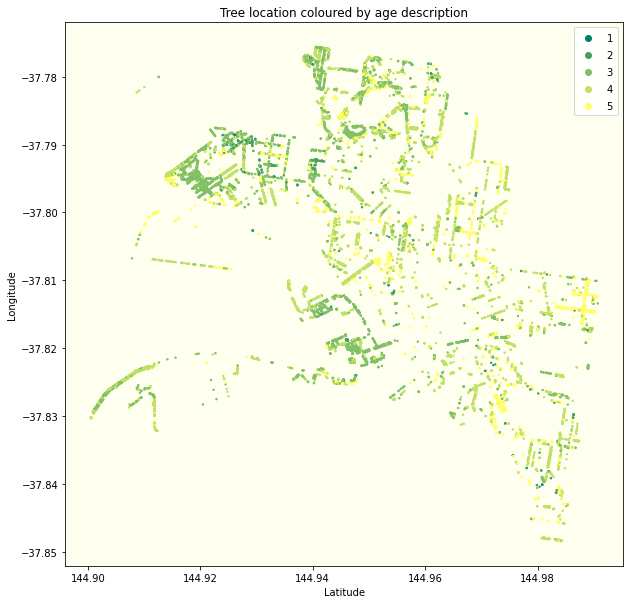

In [62]:
plt.figure(figsize=(10,10))

# Setting the background color of the plot 
ax = plt.axes()
ax.set_facecolor("#FFFFF0")

scatter = plt.scatter(dftrees2['Longitude'], dftrees2['Latitude'], s=2, 
    c=dftrees2['Age Description code'], cmap='summer', label=dftrees2['Age Description code'])

# scatter = plt.scatter(dftrees2['Latitude'], dftrees2['Longitude'], s=2, 
#     c=dftrees2['Age in years'], cmap='summer', label=dftrees2['Age in years'])

plt.title("Tree location coloured by age description")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend(*scatter.legend_elements(), prop={'size': 10})
# plt.savefig("treeLocByAgeDesc.png")
plt.show()

In [63]:
NtreesStreet = len(dftrees2[dftrees2['Located in']=='Street'])*100/len(dftrees2)
NtreesPark = len(dftrees2[dftrees2['Located in']=='Park'])*100/len(dftrees2)

print('Percentage of trees planted in Street %s' %(NtreesStreet), 'Percentage of trees planted in Parks %d' %(NtreesPark))

Percentage of trees planted in Street 55.80963783298414 Percentage of trees planted in Parks 44


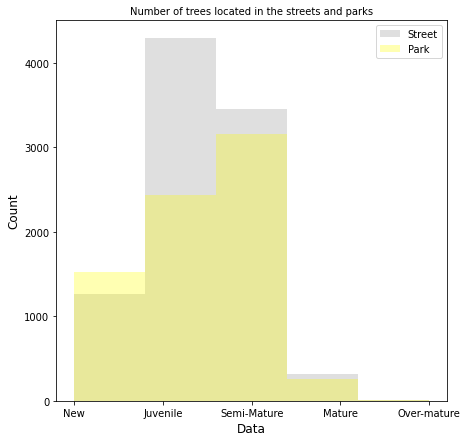

In [64]:
plt.figure(figsize=(7,7))
plt.hist(dftrees2[dftrees2['Located in']=='Street'].sort_values('Age Description code', ascending=False)["Age Description"] , bins=5, alpha=0.5, color = '#C0C0C0', label="Street")
plt.hist(dftrees2[dftrees2['Located in']=='Park'].sort_values('Age Description code', ascending=False)["Age Description"] , bins=5, alpha=0.3, color = '#FFFF00', label="Park")
plt.xlabel("Data", size=12)
plt.ylabel("Count", size=12)
plt.title("Number of trees located in the streets and parks", size=10)
plt.legend(loc='upper right')
# plt.savefig("NofTressStreetPark.png")

56% of the trees are planted in the streets and the remaining 44% in parks. This is quite interesting if one notices that parks account for nearly 0.05% of the city's total area. So even though more trees are planted in the street (considering absolute values), the same amount survived until maturity in both locations. This implies that Parks are in fact a better environment for tree development.

In [65]:
dftrees1=dftrees.copy()

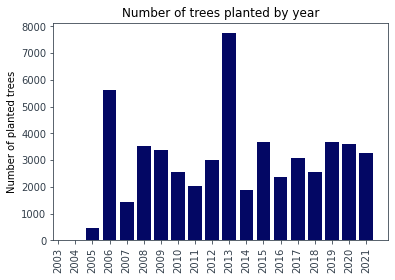

In [160]:
plt.bar(dftrees1.groupby('Year Planted').count().index, dftrees1.groupby('Year Planted').count()['CoM ID'], color='#030764')
plt.title("Number of trees planted by year")
plt.ylabel("Number of planted trees")
plt.xticks(ticks=[*range(2003,2022,1)])
plt.xticks(rotation=90)
# plt.savefig("NofTressPerYear.png")
plt.show()

If we take a closer look at how many trees were planted per year since 2003, it is clear that 2013 stands out quite notorious comparing with the other years.  This can be explained by the approval of the 'Urban forest' strategy in 2012 that sat a bold target of doblind the canopy within less than 30 years ([font](https://heritagecouncil.vic.gov.au/wp-content/uploads/2014/09/ROYAL-PARK-ED-Rec-Feb-2014.pdf)). Furthermore, by that time many of Melbourne's trees were reaching the end of their natural life span which created an immediate urgency of replanting.  

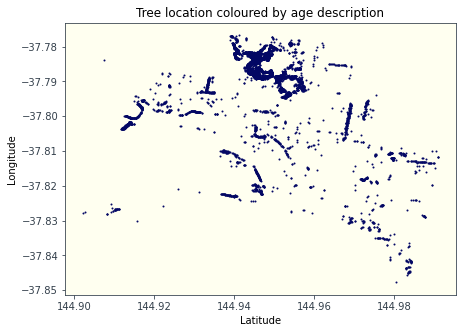

In [167]:
dftrees01 = dftrees1[dftrees1['Year Planted']==2013]

plt.figure(figsize=(7,5))
ax = plt.axes()
ax.set_facecolor("#FFFFF0")

plt.scatter(dftrees01['Longitude'], dftrees01['Latitude'], s=1, c='#030764')

plt.title("Tree location coloured by age description")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.savefig("treeLoc2013.png")
plt.show()


The great majority of these trees were planted in the Royal Park which doesn't come as a big surprise after our first conclusion about trees' reaching a higher maturity when located in parks. This, together with the fact that the royal park is an old green space within the city with a higher chance of having kept old trees until that date. These trees were most likely reaching their end of life and were therefore replanted that same year after the strategy approval.

Bellow it can find an overview of the 10 most planted families of trees in that year (2013). The red dashed line is a threshold of 200 trees planted that provides a better understanding when comparing the different families. 3 out of the 34 existing families of trees alone - Myrtaceae, Fabaceae, and Casuarinaceae - account for 81% of the total amount of trees planted in 2013.

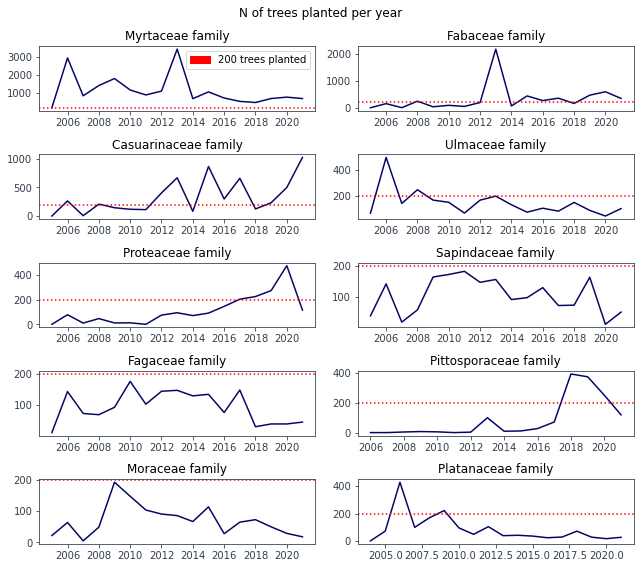

In [174]:
#the top 10 most planted trees' families

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=[9, 8])
fig.suptitle('N of trees planted per year', fontsize=12)

uperbound =200

ax1.plot(dftrees1[dftrees1['Family'] == 'Myrtaceae'].groupby('Year Planted').count()['CoM ID'], color='#030764')
ax1.axhline(y = uperbound, color = 'r', linestyle = ':', label = "treshold")
ax1.title.set_text('Myrtaceae family')
red_patch = mpatches.Patch(color='red', label='200 trees planted')
ax1.legend(handles=[red_patch])

ax2.plot(dftrees1[dftrees1['Family'] == 'Fabaceae'].groupby('Year Planted').count()['CoM ID'], color='#030764')
ax2.axhline(y = uperbound, color = 'r', linestyle = ':', label = "treshold")
ax2.title.set_text('Fabaceae family')

ax3.plot(dftrees1[dftrees1['Family'] == 'Casuarinaceae'].groupby('Year Planted').count()['CoM ID'], color='#030764')
ax3.axhline(y = uperbound, color = 'r', linestyle = ':', label = "treshold")
ax3.title.set_text('Casuarinaceae family')

ax4.plot(dftrees1[dftrees1['Family'] == 'Ulmaceae'].groupby('Year Planted').count()['CoM ID'], color='#030764')
ax4.axhline(y = uperbound, color = 'r', linestyle = ':', label = "treshold")
ax4.title.set_text('Ulmaceae family')

ax5.plot(dftrees1[dftrees1['Family'] == 'Proteaceae'].groupby('Year Planted').count()['CoM ID'], color='#030764')
ax5.axhline(y = uperbound, color = 'r', linestyle = ':', label = "treshold")
ax5.title.set_text('Proteaceae family')

ax6.plot(dftrees1[dftrees1['Family'] == 'Sapindaceae'].groupby('Year Planted').count()['CoM ID'], color='#030764')
ax6.axhline(y = uperbound, color = 'r', linestyle = ':', label = "treshold")
ax6.title.set_text('Sapindaceae family')

ax7.plot(dftrees1[dftrees1['Family'] == 'Fagaceae'].groupby('Year Planted').count()['CoM ID'], color='#030764')
ax7.axhline(y = uperbound, color = 'r', linestyle = ':', label = "treshold")
ax7.title.set_text('Fagaceae family')

ax8.plot(dftrees1[dftrees1['Family'] == 'Pittosporaceae'].groupby('Year Planted').count()['CoM ID'], color='#030764')
ax8.axhline(y = uperbound, color = 'r', linestyle = ':', label = "treshold")
ax8.title.set_text('Pittosporaceae family')

ax9.plot(dftrees1[dftrees1['Family'] == 'Moraceae'].groupby('Year Planted').count()['CoM ID'], color='#030764')
ax9.axhline(y = uperbound, color = 'r', linestyle = ':', label = "treshold")
ax9.title.set_text('Moraceae family')

ax10.plot(dftrees1[dftrees1['Family'] == 'Platanaceae'].groupby('Year Planted').count()['CoM ID'], color='#030764')
ax10.axhline(y = uperbound, color = 'r', linestyle = ':', label = "treshold")
ax10.title.set_text('Platanaceae family')

fig.tight_layout()
plt.savefig("top10FamPlanted2013.png")

<AxesSubplot:xlabel='Family'>

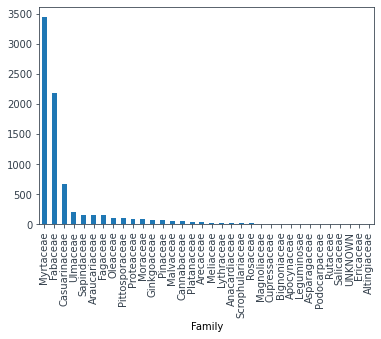

In [182]:
dftrees1[dftrees1['Year Planted']==2013].groupby('Family').count()['CoM ID'].sort_values(ascending=False).plot.bar()

In [183]:
dftrees1[dftrees1['Year Planted']==2013].groupby('Family').count()['CoM ID'].sum()

7744

In [184]:
len(dftrees1[dftrees1['Year Planted']==2013].groupby('Family').count()['CoM ID'])

34

In [185]:
dftrees1[dftrees1['Year Planted']==2013].groupby('Family').count()['CoM ID'][['Myrtaceae', 'Fabaceae', 'Casuarinaceae']].sum()

6295

**DIVERSIFICATION**

Diversification is a key approach to reducing risk. Combining different species makes the forest more resilient and more stable in the long term.
Not doing it weakens the urban forest's capability of fighting pests, disease, and stress due to climate change.

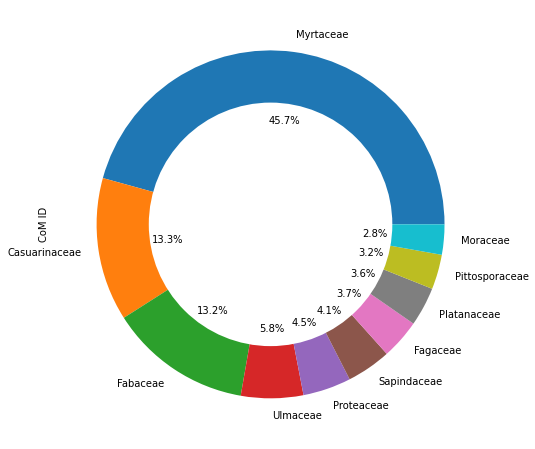

In [75]:
# Visualization of % of families planted
dftrees.groupby(['Family']).count()['CoM ID'].sort_values(ascending=False)[:10].plot.pie(figsize=(8,8), autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

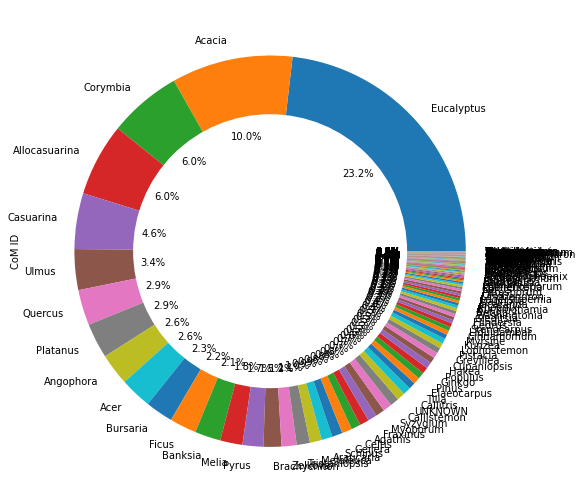

In [71]:
# % of trees Genus visualization
dftrees.groupby('Genus').count()['CoM ID'].sort_values(ascending=False).plot.pie(figsize=(9,9),  autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("treeGenusDivers.png")
plt.show()

**Eucalyptus** are Austrailian native trees, fast growing sources of wood and oil producers that can be used for cleaning and as a natural insecticides.

**Acacias** are native to Australia and Africa and easily grow in warm climates. Most types are fast growers but usualy dont live more than 20-30years.

**Allocasuarina** is endemic to Australia. Tipical of nutrient-impoverished soils

**Corymbia** is referred to as eucalypts. Until 1990, corymbias were included in the genus Eucalyptus and there is still considerable disagreement among botanists as to whether separating them is valid. As of January 2020, Corymbia is an accepted name at the Australian Plant Census.

**Casuarina** native to Australia. fast growing with wide-ranging adaptability to differnet environmnets.

In [72]:
top5genus=dftrees.groupby('Genus').count()['CoM ID'].sort_values(ascending=False)[:5].index

In [73]:
top5genus

Index(['Eucalyptus', 'Acacia', 'Corymbia', 'Allocasuarina', 'Casuarina'], dtype='object', name='Genus')

In [74]:
dftrees.groupby(['Family']).count()['CoM ID'].sort_values(ascending=False)[:10]

Family
Myrtaceae         19667
Casuarinaceae      5729
Fabaceae           5690
Ulmaceae           2488
Proteaceae         1925
Sapindaceae        1777
Fagaceae           1589
Platanaceae        1560
Pittosporaceae     1392
Moraceae           1206
Name: CoM ID, dtype: int64

**COMENT**

### Life Expectancy of Trees - prediction challenge

In [252]:
dftrees['Useful Life Expectency Value'].unique()

array([nan, 60., 80., 20., 30.,  5., 10.,  1.])

In [253]:
dftrees.columns

Index(['CoM ID', 'Common Name', 'Scientific Name', 'Genus', 'Family',
       'Diameter Breast Height', 'Year Planted', 'Date Planted',
       'Age Description', 'Useful Life Expectency',
       'Useful Life Expectency Value', 'Located in', 'Latitude', 'Longitude'],
      dtype='object')

In [254]:
col=['Common Name','Scientific Name', 'Genus', 'Family',
       'Diameter Breast Height', 'Year Planted', 'Date Planted',
       'Age Description', 'Useful Life Expectency Value', 'Located in']
       
dftrees5 = dftrees.copy()
dftrees5 = dftrees5[col]
dftrees5 = dftrees5.dropna()
len(dftrees5)

16704

In [255]:
dftrees5.corr()['Useful Life Expectency Value'].sort_values()

Diameter Breast Height         -0.233658
Year Planted                    0.053656
Useful Life Expectency Value    1.000000
Name: Useful Life Expectency Value, dtype: float64

In [256]:
len(dftrees5['Diameter Breast Height'].unique())

110

In [257]:
# One-hot encode the data using pandas get_dummies
dftrees5 = pd.get_dummies(dftrees5)

In [258]:
dftrees5.corr()['Useful Life Expectency Value'].abs().sort_values()

Date Planted_15/11/2006                                 0.000319
Scientific Name_Eucalyptus leucoxylon subsp. connata    0.000458
Common Name_Melbourne Yellow-Gum                        0.000458
Date Planted_04/06/2009                                 0.000458
Date Planted_05/09/2007                                 0.000458
                                                          ...   
Scientific Name_Eucalyptus camaldulensis                0.284355
Common Name_River red gum                               0.284355
Genus_Eucalyptus                                        0.285520
Family_Myrtaceae                                        0.329512
Useful Life Expectency Value                            1.000000
Name: Useful Life Expectency Value, Length: 838, dtype: float64

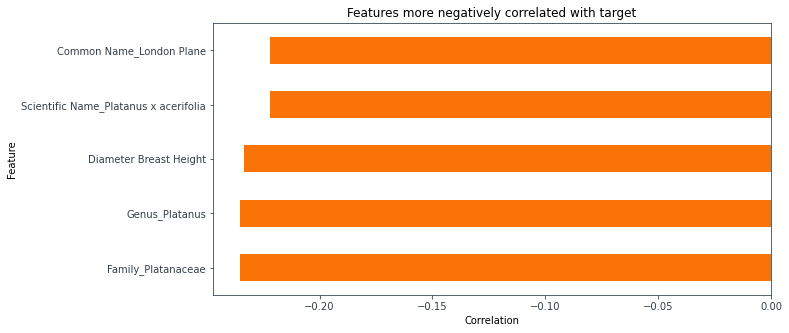

In [259]:
dftrees5.corr()['Useful Life Expectency Value'].sort_values()[:5].plot.barh(
    title = 'Features more negatively correlated with target', color='#F97306', figsize = (10,5), 
    legend = False)
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.savefig("negcorr.png")

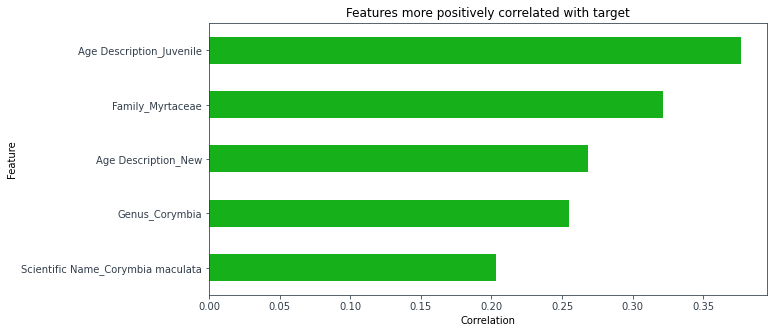

In [199]:
dftrees5.corr()['Useful Life Expectency Value'].sort_values()[-6:-1].plot.barh(
    title = 'Features more positively correlated with target', color='#15B01A', figsize = (10,5), 
    legend = False)
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.savefig("poscorr.png")

In [260]:
# values we want to predict
labels = np.array(dftrees5['Useful Life Expectency Value'])

# Remove the labels from the features
# axis 1 refers to the columns
dftrees5 = dftrees5.drop('Useful Life Expectency Value', axis = 1)

# Saving feature names for later use
feature_list = list(dftrees5.columns)

# Convert to numpy array
dftrees5 = np.array(dftrees5)

In [261]:
from sklearn import decomposition

pca=decomposition.PCA()

pca.fit(dftrees5)

PCA()

In [262]:
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
cdf[:18]

[0.9517254443794421,
 0.9662104453675783,
 0.9701936178092644,
 0.9728197813177143,
 0.9749830289523148,
 0.9765605442694667,
 0.9777558350261883,
 0.9788390791012455,
 0.9798105065268525,
 0.9806821146990135,
 0.9814593434747021,
 0.9822246839663636,
 0.9828926802286726,
 0.9834683442782362,
 0.9840083827935098,
 0.9845422946394408,
 0.9850543263930108,
 0.985518873187241]

In [263]:
#the first 9 eign vect explain 98.5% of the data

pca_upd=decomposition.PCA(n_components=17)
pca_upd.fit(dftrees5)

PCA(n_components=17)

In [264]:
X_reduced=pca_upd.transform(dftrees5)
X_reduced.shape

(16704, 17)

In [265]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_reduced, labels, test_size = 0.3, random_state = 42)

In [266]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [267]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8683160415003991


In [268]:
from sklearn.metrics import average_precision_score

# Compute the average precision score
from sklearn.metrics import precision_score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

Micro-averaged precision score: 0.87
Macro-averaged precision score: 0.68


In [269]:
features = pd.DataFrame(X_reduced)

In [270]:
#modelname.feature_importance_
y = clf.feature_importances_

In [271]:
ftimportance = pd.DataFrame(y)
ftimportance.rename(columns = {0 : 'feature_importances_'}, inplace = True)
ftimportance['feature ind']=[i for i in range(len(y))]
ftimportance = ftimportance.sort_values('feature_importances_', ascending=True)
# ftimportance

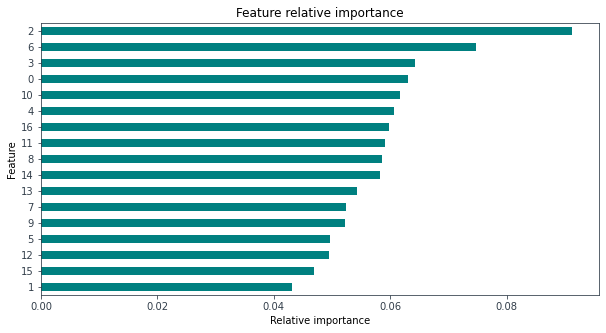

In [273]:
ftimportance.plot.barh(x = 'feature ind', title = 'Feature relative importance', color='#008080',
                  figsize = (10,5), legend = False)
plt.xlabel('Relative importance')
plt.ylabel('Feature')
plt.savefig("featuresImp.png")

### Tree Impact

##### Impact on temperature
To examine the impact of trees on the temperature, we add two datasets to the analysis. The first contains the locations of microclimate sensors in Melbourne and the second one contains the actual readings these sensors made. The second dataset contains a lot of different variables, but for our analysis we only use the temperature. 

**Microclimate Sensor Locations** 

*Source: https://data.melbourne.vic.gov.au/Environment/Microclimate-Sensor-Locations/irqv-hjr4*  
*Data Last updated: May 10, 2022*  

>    1. `site_id`: unique location id referring to the location of the sensor device (used to link the location of the sensor device to the Microclimate Sensor Readings dataset);
>    2. `gateway_hub_id`: unique sensor device id (each sensor device will contain multiple sensors);
>    3. `description`: description of the location of the sensor device;
>    4. `last_data`: date and time when the last data was sent from a sensor associated with the sensor device;
>    5. `site_status`: indicates if the site is a historic location for the sensor device or currently in use. R = retired, the location is no longer in use. C = current, the present location of the sensor device;
>    6. `start_reading`: date and time sensor device began transmitting data from this site;
>    7. `end_reading`: date and time sensor device stopped transmitting data from this site;
>    8. `longitude`: longitude of the site;
>    9. `latitude`: latitude of the site;
>    10. `location`: spatial location;

**Microclimate Sensor Readings** 

*Source: https://data.melbourne.vic.gov.au/Environment/Microclimate-Sensor-Readings/u4vh-84j8*  
*Data Last Updated: May 10, 2022* 


>    1. `id`: unique id for each record in the dataset;
>    2. `site_id`: unique id referring to the location of sensor (spatial locations provided in Microclimate Sensor Locations dataset);
>    3. `gateway_hub_id`: unique sensor device id (each sensor device will contain multiple sensors);
>    4. `sensor_id`: unique sensor id, we will only use records that have sensor_id `5a.EPA-1hr`, because these sensors measure the average air temperature every hour;
>    5. `value`: sensor reading (dependent on sensor_id);
>    6. `local_time`: local date and time;
>    7. `type`: name of sensor type;
>    8. `units`: units of measurement;

**Data cleaning and preprocessing**  
* The data is imported from the csv files.
* The data is filtered on active sensors and sensors that read the average temperature per hour.
* The dataset containing the sensor locations is merged with the dataset containing the sensor readings.
* The hour and date are extracted from the Local Time column of the dataset.

In [76]:
# read data files
df_sensor_loc = pd.read_csv("Microclimate_Sensor_Locations.csv", usecols=['site_id', 'longitude', 'latitude', 'location', 'description', 'site_status'])
df_sensor_read = pd.read_csv("Microclimate_Sensor_Readings.csv", parse_dates=True)

# filter on active sensors
df_sensor_loc = df_sensor_loc.loc[df_sensor_loc.site_status == 'C']

# filter out sensors that don't read temperature
df_sensor = df_sensor_read.loc[df_sensor_read.sensor_id == '5a.EPA-1h']

# merge sensor locations with measured temperatures
df_sensor = pd.merge(df_sensor, df_sensor_loc, on='site_id')

# split hour and date from local time
df_sensor['Hour'] = df_sensor.local_time.str[11:13]
df_sensor['AM/PM'] = df_sensor.local_time.str[-2:]
df_sensor.local_time = df_sensor.local_time.str[:-2]
df_sensor['local_time'] = pd.to_datetime(df_sensor['local_time'],format='%Y/%m/%d')
df_sensor['Hour'] = df_sensor['Hour'].astype('int')
df_sensor.loc[df_sensor['AM/PM'] == 'PM', 'Time'] = df_sensor.loc[df_sensor['AM/PM'] == 'PM'].Hour + 12
df_sensor.loc[df_sensor['AM/PM'] == 'AM', 'Time'] = df_sensor.loc[df_sensor['AM/PM'] == 'AM'].Hour
df_sensor['Date'] = pd.DatetimeIndex(df_sensor['local_time']).date

**Exploratory Data Analysis**  

In [188]:
print("Number of rows in sensor reading dataset: ", len(df_sensor))
print("Number of sensors: ", len(df_sensor_loc))

Number of rows in sensor reading dataset:  46063
Number of sensors:  9


In [77]:
# create map of sensor locations in Melbourne
map = folium.Map([-37.817, 144.9631], zoom_start=14.5)

locations = df_sensor_loc[['latitude', 'longitude']]
locationlist = locations.values.tolist()

loc = 'Visualization of Sensor Locations in Melbourne'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 

for point in range(len(locationlist)):
    popup = "Sensor ID: " + str(df_sensor_loc.iloc[point].site_id) + "\n" + df_sensor_loc.iloc[point].description
    folium.Marker(locationlist[point], popup=popup).add_to(map)
map.get_root().html.add_child(folium.Element(title_html))

map.save('sensor-locations.html')

map

This map shows the locations of the different sensors in Melbourne. The sensors are spread quite well throughout the inner city. There is one location that has multiple sensors close to each other, which are the sensors close to the Convention Centre by the Docklands (1007, 1010 and 1011).

In [78]:
# copy dataframe with trees
df_tree_sensor = dftrees.copy()
df_tree_sensor['Date Planted'] = pd.to_datetime(df_tree_sensor['Date Planted'],format='%d/%m/%Y')

In [79]:
# calculate average temperature in a day
df_temperature = pd.DataFrame()
group = df_sensor.groupby(['site_id', 'longitude', 'latitude', 'Date'])
df_temperature['Temperature'] = group.value.mean()
df_temperature = df_temperature.reset_index(level=['site_id', 'longitude', 'latitude', 'Date'])

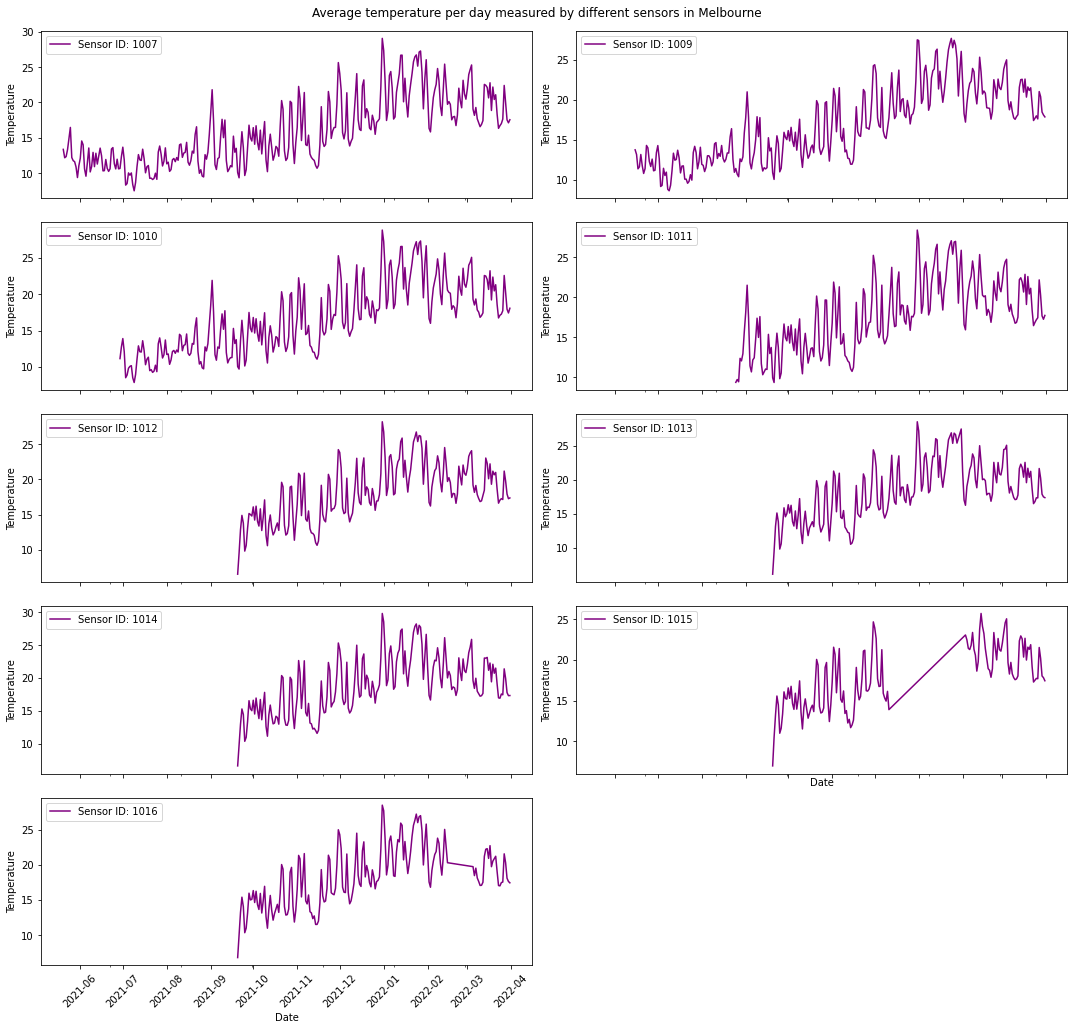

In [80]:
# create plots of temperature for each sensor
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,15), sharex=True, squeeze=True)
fig.delaxes(axes[4,1]) 
row = 0
column = 0

for siteid in df_temperature.site_id.unique():
    label = "Sensor ID: " + str(siteid)
    df_temperature.loc[df_temperature.site_id == siteid].plot(x='Date', y='Temperature', ax=axes[row,column], rot=45, color = 'purple', label=label)
    axes[row,column].legend(loc='upper left')
    axes[row,column].set_ylabel('Temperature')
    if column == 0:
        column = 1
    else:
        column = 0
        row += 1

plt.tight_layout(pad=1,rect=[0, 0.03, 1, 0.97])
fig.suptitle('Average temperature per day measured by different sensors in Melbourne',y=0.98)
plt.savefig("average-temperature.png")
plt.show()


These line charts show the temperature for the different sensors in Melbourne. From these charts we can conclude that some sensors have been put into use later than some other sensors, as well as that sensor 1015 and 1016 have not recorded temperatures for a period of respectively 2 months and 1 month. That is not a problem for our research about the influence of trees on the temperature, because we will look at September 2021, because that is the last month that the tree data got updated. For the three sensors that were located closely to each other, we will use the data from sensor 1007 and not 1010 and 1011, because the data from sensor 1007 is more complete.

In [81]:
def distance_tree_sensor(latitude_sensor, longitude_sensor, latitude_tree, longitude_tree):
    ''' This function calculates the distance between two points 
    by using the Euclidean distance'''
    distance_lat = (latitude_sensor - latitude_tree) * 111132.954
    distance_long = (longitude_sensor - longitude_tree) * 111132.954 * math.cos(latitude_sensor)
    return math.sqrt(distance_lat ** 2 + distance_long ** 2)

In [82]:
# filter out the two sensors that are in the same locations as sensor 1007
df_temperature = df_temperature[df_temperature.site_id != 1010]
df_temperature = df_temperature[df_temperature.site_id != 1011]

# filter temperature df on the last day for which we have tree data
df_temperature_day = df_temperature[df_temperature.Date == datetime.date(2021,9,30)]

radius = 250
for row in range(0,len(df_temperature_day)):
    count = 0
    rowIndex = df_temperature_day.index[row]
    rowIndex2 = df_temperature_day.index[row - 1]
    latitude_sensor = df_temperature_day.loc[rowIndex, 'latitude']
    longitude_sensor = df_temperature_day.loc[rowIndex, 'longitude']
    if row > 0 and latitude_sensor == df_temperature_day.loc[rowIndex2, 'latitude'] and longitude_sensor == df_temperature_day.loc[rowIndex2, 'longitude']:
        df_temperature_day.loc[rowIndex, 'Count'] = df_temperature_day.loc[rowIndex2, 'Count']
    else:
        for row2 in range(0,len(df_tree_sensor)):
            rowIndextree = df_tree_sensor.index[row2]
            latitude_tree = df_tree_sensor.loc[rowIndextree, 'Latitude']
            longitude_tree = df_tree_sensor.loc[rowIndextree, 'Longitude']
            if distance_tree_sensor(latitude_sensor, longitude_sensor, latitude_tree, longitude_tree) < radius:
                count += 1
        df_temperature_day.loc[rowIndex, 'Count'] = count

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [83]:
# round temperature to two decimals
df_temperature_day = df_temperature_day.round({'Temperature': 2})

map = folium.Map([-37.8166, 144.9635], zoom_start=14.5)

loc = 'Visualization of Temperature in Melbourne with number of trees in 250m radius'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 

locations = df_temperature_day[['latitude', 'longitude']]
locationlist = locations.values.tolist()

colormap = cm.LinearColormap(colors=['pink','red'], index=[df_temperature_day.Temperature.min(),df_temperature_day.Temperature.max()],vmin=df_temperature_day.Temperature.min(),vmax=df_temperature_day.Temperature.max())

for point in range(len(locationlist)):
    folium.Circle([df_temperature_day.iloc[point].latitude, df_temperature_day.iloc[point].longitude],
                    radius=df_temperature_day.iloc[point].Count, fill=True, fill_color=colormap(df_temperature_day.iloc[point].Temperature),
                    fill_opacity=1, color=colormap(df_temperature_day.iloc[point].Temperature),
                    popup=df_temperature_day.iloc[point].Count
                   ).add_to(map)
    folium.map.Marker(
    [df_temperature_day.iloc[point].latitude + 0.00035, df_temperature_day.iloc[point].longitude - 0.0007],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 10pt">%s</div>' % df_temperature_day.iloc[point].Temperature,
        )
    ).add_to(map)
    #folium.Marker(locationlist[point], popup=[df_temperature_day.iloc[point].Temperature, df_temperature_day.iloc[point].Count]).add_to(map)
map.get_root().html.add_child(folium.Element(title_html))
map.save('tree-temperature.html')

map

This map shows the temperature measured by different sensors in Melbourne. The size of the circle shows the number of trees in a 250 meter radius around the sensor. The expectation was that the measured temperature would be lower for sensors that are surrounded by more trees ([source](https://www.epa.gov/heatislands/using-trees-and-vegetation-reduce-heat-islands)). However, the highest temperature recorded was for a sensor with the highest number of trees whereas the lowest temperature of 14.57 degrees is measured by a sensor that is surrounded by an average number of trees. What stands out about this location is that it is located by the Docklands, which means it is by the water. An explanation for the lower temperature in this area is that the water coming from the ocean has a cooling effect ([source](https://floridakeys.noaa.gov/ocean/weather.html)). 

To further investigate the relationships between trees and temperature we made a linear regression model. For this linear regression model we added the variable 'Time' which is the time of the day and the variable 'Count', which is the number of trees in a 250m radius from the sensor.

**Linear Regression Model**  
We create a Linear Regression model to predict the temperature based on the hour of the day and the number of trees in a 250 meter radius from the sensor.

In [84]:
df_sensor1 = df_sensor.loc[df_sensor.Date == datetime.date(2021,9,30)]
df_sensor1 = df_sensor1[['site_id', 'longitude', 'latitude', 'Time', 'value']].sort_values(['site_id', 'Time'])

In [85]:
df_sensor1 = df_sensor1[df_sensor1.site_id != 1010]
df_sensor1 = df_sensor1[df_sensor1.site_id != 1011]

# copy nr of trees for each time from df with count
for row in range(0,len(df_sensor1)):
    for row2 in range(0,len(df_temperature_day)):
        rowIndex = df_sensor1.index[row]
        rowIndex2 = df_temperature_day.index[row2]
        if df_sensor1.loc[rowIndex, 'site_id'] == df_temperature_day.loc[rowIndex2, 'site_id']:
            df_sensor1.loc[rowIndex, 'Count'] = df_temperature_day.loc[rowIndex2, 'Count']

In [86]:
# create dummy variables for the time
dummies = pd.get_dummies(df_sensor1['Time'], drop_first=True, prefix='Time')
df_sensor1 = df_sensor1.join(dummies)

# split data into x variables and y variable
y = df_sensor1['value']
x = df_sensor1.drop(['Time', 'site_id', 'longitude', 'latitude', 'value'], axis=1)

# create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [87]:
# create linear regression model
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.40108811529083366
Mean Squared Error: 0.32964009943629097
Root Mean Squared Error: 0.5741429259655569
R2-score:  0.8318994323179513


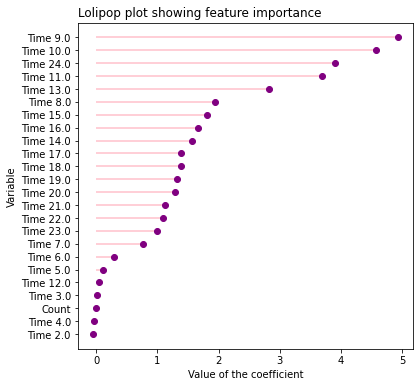

In [88]:
coeff_df = pd.DataFrame({'Coefficient': reg.coef_, 'Variable': x.columns})
coeff_df = coeff_df.replace('_', ' ', regex=True)

# Reorder it based on the values
ordered_df = coeff_df.sort_values(by='Coefficient')
my_range=range(1,len(coeff_df.index)+1)
 
plt.figure(figsize=(6,6))

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Coefficient'], color='pink')
plt.plot(ordered_df['Coefficient'], my_range, "o", color='purple')
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['Variable'])
plt.title("Lolipop plot showing feature importance", loc='left')
plt.xlabel('Value of the coefficient')
plt.ylabel('Variable')

plt.savefig("lolipop.png")

# Show the plot
plt.show()

The linear regression model has a high R2-score of 0.83, which means the model is good at predicting the temperature in Melbourne when given the time of the day and the number of trees surrounding the sensor. However, the lolipop plot shows that the number of trees has a very low influence on the temperature, which we already suspected from the map we made before. To make a better analysis of the influence of the trees, more data has to be available with historic tree numbers in Melbourne, so the analysis can be done on more than just one day. On top of that, there could be other environmental factors that influence the temperature, for example the presence of water by the sensor. 

##### Impact on anxiety and stress

Trees have a positive influence on anxiety and stress levels of people ([source](https://www.weforum.org/agenda/2021/04/city-trees-reduce-stress-and-anxiety/)). Therefore we are examining the presence of trees around certain facilities in Melbourne. To do this we add an extra dataset to the analysis. This dataset contains the locations of facilities in Melbourne, and a few extra variables: theme, sub theme and feature name.

**Landmarks and places of interest, including schools, theatres, health services, sports facilities, places of worship, galleries and museums**  
*Source: https://data.melbourne.vic.gov.au/People/Landmarks-and-places-of-interest-including-schools/j5vt-ppat*  
*Data last updated: March 12, 2021*  

>    1. `Theme`: theme (category) of feature name;
>    2. `Sub Theme`: subtheme (subcategory) of the feature name;
>    3. `Feature Name`: nae of the landmark;
>    4. `Co-ordinates`: co-ordinates of the landmark;

For our analysis we focus on facilities that can be categorized into one of the following themes:

* Health Services: hospitals and medical centres
* Education Centre: primary schools, secondary schools and universities
* Office: offices
* Leisure/Recreation: parks, sport locations and indoor and outdoor recreational facilities
* Community Use: police and fire stations, cemeteries, government buildings and visitor centres

The goal of the analysis is to find out if there are more trees around locations that can be considered stressful, like hospitals ([source](https://www.researchgate.net/publication/215477754_How_do_patients_experience_stress_caused_by_hospitalization_and_how_do_nurses_perceive_this_stress_experienced_by_patients_A_comparative_study)), schools ([source](https://www.npr.org/sections/health-shots/2013/12/02/246599742/school-stress-takes-a-toll-on-health-teens-and-parents-say?t=1652184699945)), police stations and offices ([source](https://www.cnbc.com/2021/08/03/1-in-3-people-say-return-to-office-negatively-impacted-mental-health.html)) compared to recreational facilities.

**Data cleaning and preprocessing**  
* The data is imported from the csv file. 
* The longitude and latitude are extracted from the Co-ordinates column by splitting the string and changing the variable type to float.
* The data is filtered on our chosen facility categories.

In [89]:
# read data
df_fac = pd.read_csv("LANDMA_1.CSV")

# extract longitude and latitude from coordinates
df_fac['longitude'] = df_fac['Co-ordinates'].str.split(',', n=1).str.get(-1)
df_fac['longitude'] = df_fac['longitude'].map(lambda x: str(x)[:-1]).astype(float)
df_fac['latitude'] = df_fac['Co-ordinates'].str.split(',',n=1).str.get(0)
df_fac['latitude'] = df_fac['latitude'].map(lambda x: str(x)[1:]).astype(float)

# filter on focus themes
facility_groups = ['Health Services', 'Education Centre', 'Office', 'Leisure/Recreation', 'Community Use']
df_fac_box = df_fac[df_fac['Theme'].isin(facility_groups)]

**Exploratory data analysis**

In [180]:
print("Number of rows in dataset: ", len(df_fac_box))

Number of rows in dataset:  119


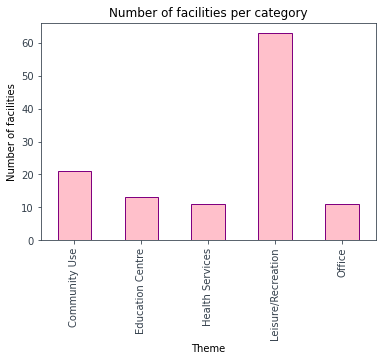

In [176]:
# get number of facilities per theme
counts = df_fac_box.groupby(['Theme'])
data = pd.DataFrame()
data['Nr of Facilities'] = counts.size()
data = data.reset_index(level=['Theme'])

# make a bar chart of facility numbers
data.plot(x='Theme', y='Nr of Facilities', kind='bar', color='pink', edgecolor='purple', legend=False)
plt.ylabel("Number of facilities")
plt.title("Number of facilities per category")
plt.savefig("bar-facilities.png")
plt.show()


The bar chart shows that there are a lot more Leisure/Recreation facilities in Melbourne than facilities from the other four categories. This makes sense, because of facilities like police stations there are only a few needed, whereas sports facilities need to be located all over the city.

In [90]:
# calculate number of trees within 250m radius of facility

radius = 250
for row in range(0,len(df_fac_box)):
    rowIndex = df_fac_box.index[row]
    rowIndex2 = df_fac_box.index[row - 1]
    count = 0
    latitude_fac = df_fac_box.loc[rowIndex, 'latitude']
    longitude_fac = df_fac_box.loc[rowIndex, 'longitude']
    if row > 0 and latitude_fac == df_fac_box.loc[rowIndex2, 'latitude'] and longitude_fac == df_fac_box.loc[rowIndex2,'longitude']:
        df_fac_box.loc[rowIndex, 'Count'] = df_fac_box.loc[rowIndex2, 'Count']
    else:
        for row2 in range(0,len(df_tree_sensor)):
            rowIndexTree = df_tree_sensor.index[row2]
            latitude_tree = df_tree_sensor.loc[rowIndexTree, 'Latitude']
            longitude_tree = df_tree_sensor.loc[rowIndexTree, 'Longitude']
            if distance_tree_sensor(latitude_fac, longitude_fac, latitude_tree, longitude_tree) < radius:
                count += 1
        df_fac_box.loc[rowIndex, 'Count'] = count

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


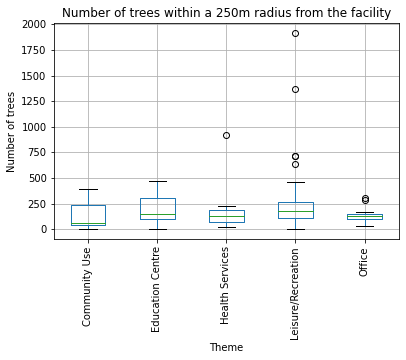

In [95]:
# create boxplot
df_fac_box.boxplot(column='Count', by='Theme')
plt.xticks(rotation=90)
plt.ylabel("Number of trees")
plt.xlabel("Theme")
plt.title("Number of trees within a 250m radius from the facility")
plt.suptitle("")
plt.savefig("boxplot.png")
plt.show()

The boxplot shows that there are no big differences in the number of trees surrounding different types of facilities. Around leisure and recreation facilities there seem to be a little bit more trees than around the other facility types. In order to reduce stress and anxiety amongst citizens in Melbourne it could be a good idea for the city to focus on planting more trees around the other facility types, because those facility types are already stressful places that could really benefit from having more trees there.

### Demographic Perspective

In addition to the trees data set, the _Residents Profiles by CLUE Small Area_ data set has been chosen to include the demographic aspect into our analysis. This [data set](https://data.melbourne.vic.gov.au/People/Residents-Profiles-by-CLUE-Small-Area/d34a-re98) contains the demographic profile information for City of Melbourne residents from the ABS 2011 and 2016 Census of Population and Housing. Data has been aggregated by City of Melbourne small areas.\
It is formed by 7 columns (shown below) and 10.8K rows, the last update occured in March 12, 2021.

1. `geography`: area of interest, it includes the City of Melbourne municipality, 10 City of Melbourne small areas, and the Greater Melbourne region
2. `year`: census year, i.e. 2011 and 2016
3. `topic`: census topics related to residents and households. As examples, in the analysis that will follow the topics *Residents: Income and Employment* _Residents: Education_ and *Residents: Ethnicity* are investigated
4. `category`: census questions/characteristics related to residents and households. Still for explanatory purpose, for each of the three previous topics the following categories _Personal income - median_, *Non-school qualification: level of education - overview* and _Proficiency in spoken English_ has been respectively used in the analysis
5. `sub_category`: it can be count of persons/ households; medians; averages etc. It **qualitatively** describes the column `value`
6. `value_description`: definition of the value column e.g. number of persons or dwellings, dollars, years etc. It __quantitatively__ describes the column `value`
7. `value`: actual value, it can be count of persons/ households; medians; averages etc.

The demographic perspective adopted in this analysis will consider, in particular, **income**, __education__ and **ethnicity**.\
A note for the reader, those three topics have been selected after a thorough investigation about all the topics and related categories, that however will not be reported here for readability's sake. In the following will just be shown the final decision of the best topic or category, for each topic, to use. 

**Data cleaning and preprocessing**  
* The data about trees and demography is imported from the csv files, and JSON file is used in addition for the geographical representation of Melbourne areas. 
* Both the demography and the geoJSON data frames are preprocessed to be eventually merged, as shown in the following. The main changes involve the merging key that is the geographical area, thus renaming and removing the unnecessary areas.
* Data is filtered according to the chosen demographic topics and categories.

In [100]:
# demographic profile information for City of Melbourne residents
# 2011 and 2016 Census profile data for City of Melbourne residents and households by City of Melbourne small areas
df_resid = pd.read_csv("Residents_Profiles_by_CLUE_Small_Area.csv")

In [101]:
df_resid.head()

,geography,year,topic,category,sub_category,value_description,value
0,Carlton,2011,Residents: Age and gender,Age - key groups,Children (0-11 years),Count of persons,816.0
1,Carlton,2011,Residents: Age and gender,Age - key groups,Youth (12-25 years),Count of persons,6528.0
2,Carlton,2011,Residents: Age and gender,Age - key groups,Adult (26-59 years),Count of persons,5623.0
3,Carlton,2011,Residents: Age and gender,Age - key groups,Older (60 years and over),Count of persons,1276.0
4,Docklands,2011,Residents: Age and gender,Age - key groups,Children (0-11 years),Count of persons,301.0


List of topics that can be potentially investigated.

In [102]:
topics = df_resid['topic'].unique().tolist()
topics

['Residents: Age and gender',
 'Residents: Ethnicity',
 'Households: Dwellings',
 'Residents: Education',
 'Households: Size and composition',
 'Households: Income and housing',
 'Households: Population',
 'Residents: Income and employment',
 'Residents: Population']

The following topic was chosen to carry out the analysis concerning income.

In [103]:
df_resInc = df_resid[df_resid['topic'] == 'Residents: Income and employment']

In [104]:
df_resInc['category'].unique().tolist()

['Personal income - key groups',
 'Personal income - median',
 'Personal income - overview',
 'Personal income - detailed',
 'Industry of employment',
 'Labour force status - overview',
 'Labour force status - detailed',
 'Method of travel to work - detailed',
 'Method of travel to work - number of methods',
 'Occupation']

#### Income

In [105]:
df_resInc[df_resInc['category'] == 'Personal income - median']

,geography,year,topic,category,sub_category,value_description,value
5190,Carlton,2011,Residents: Income and employment,Personal income - median,Median weekly personal income,Income in dollars and cents per week,432.27
5191,Docklands,2011,Residents: Income and employment,Personal income - median,Median weekly personal income,Income in dollars and cents per week,1053.67
5192,East Melbourne,2011,Residents: Income and employment,Personal income - median,Median weekly personal income,Income in dollars and cents per week,1162.54
5193,Greater Melbourne,2011,Residents: Income and employment,Personal income - median,Median weekly personal income,Income in dollars and cents per week,591.00
5194,Kensington,2011,Residents: Income and employment,Personal income - median,Median weekly personal income,Income in dollars and cents per week,904.80
5195,Melbourne (CBD),2011,Residents: Income and employment,Personal income - median,Median weekly personal income,Income in dollars and cents per week,578.45
5196,City of Melbourne,2011,Residents: Income and employment,Personal income - median,Median weekly personal income,Income in dollars and cents per week,711.00
5197,North Melbourne,2011,Residents: Income and employment,Personal income - median,Median weekly personal income,Income in dollars and cents per week,643.55
5198,Parkville,2011,Residents: Income and employment,Personal income - median,Median weekly personal income,Income in dollars and cents per week,455.20
5199,South Yarra (inc. Melbourne Remainder),2011,Residents: Income and employment,Personal income - median,Median weekly personal income,Income in dollars and cents per week,1116.78


The following category is chosen, it represents the median personal income. Besides, only the 2016's census is taken into account because considered more relevant, even though it does not differ much from the 2011's.

In [106]:
df_income = df_resInc[(df_resInc['category'] == 'Personal income - median') & (df_resInc['year'] == 2016)]

In [107]:
# restricting the data set to the columns of interest
df_income = df_income[['geography', 'value']]

##### GeoJSON file preparation

A [GeoJSON file](https://github.com/codeforgermany/click_that_hood/blob/main/public/data/melbourne.geojson) about Melbourne is also used to provide a more intuitive visualization of the demographic analysis. Geopandas is then used to read the coordinates into a data frame.\
Data cleaning and preparation follow, to allow the merge with the demographic data set.

In [108]:
# Some areas are not considered, because do not correspond to the areas in the json file
df_income.drop(df_income[(df_income.geography == 'City of Melbourne') | (df_income.geography == 'Greater Melbourne') | 
                        (df_income.geography == 'South Yarra (inc. Melbourne Remainder)')].index, axis = 0, inplace = True)

In [109]:
# This area is renamed to match the JSON file
df_income['geography'].iloc[df_income['geography'] == 'West Melbourne (Residential)'] = 'West Melbourne'

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [110]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 5202 to 5213
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   geography  9 non-null      object 
 1   value      9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 516.0+ bytes


In [111]:
# list of areas in the income data set
df_states_list = list(df_income.geography.values)

In [112]:
# importing the geoJSON file. 
url = ("https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data")
state_geo = f"{url}/melbourne.geojson"

# reading the file and print it.
geoJSON_df = gpd.read_file(state_geo)
geoJSON_df.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Cremorne,31,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.98905 -37.82341, 144.98793..."
1,Caulfield,56,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((145.01631 -37.87916, 145.01495..."
2,Carnegie,58,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((145.04613 -37.88727, 145.04495..."
3,Kingsville,107,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.88543 -37.80259, 144.87400..."
4,South Kingsville,111,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.86553 -37.83306, 144.86566..."


In [113]:
# this area is renamed to match the name in the income data set
geoJSON_df['name'].iloc[geoJSON_df['name'] == 'Melbourne (3000)'] = 'Melbourne (CBD)'

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [114]:
# check the length of the areas in the JSON
geoJSON_states = list(geoJSON_df.name.values)
len(geoJSON_states)

122

In [115]:
# Let's check which areas are missing
missing_states = np.setdiff1d(geoJSON_states,df_states_list)
missing_states

array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albert Park',
       'Altona', 'Altona Meadows', 'Altona North', 'Armadale',
       'Ascot Vale', 'Ashburton', 'Avondale Heights', 'Balaclava',
       'Balwyn', 'Balwyn North', 'Beaumaris', 'Bentleigh',
       'Bentleigh East', 'Black Rock', 'Braybrook', 'Brighton',
       'Brighton East', 'Brunswick', 'Brunswick East', 'Brunswick West',
       'Burnley', 'Camberwell', 'Canterbury', 'Carlton North', 'Carnegie',
       'Caulfield', 'Caulfield East', 'Caulfield North',
       'Caulfield South', 'Clifton Hill', 'Coburg', 'Coburg North',
       'Collingwood', 'Cremorne', 'Deepdene', 'Elsternwick', 'Elwood',
       'Essendon', 'Essendon Fields', 'Essendon North', 'Essendon West',
       'Fairfield', 'Fawkner', 'Fitzroy', 'Fitzroy North', 'Flemington',
       'Footscray', 'Gardenvale', 'Glen Huntly', 'Glen Iris', 'Glenroy',
       'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East', 'Hawthorn',
       'Hawthorn East', 'Hughesdale', 'Kew', 'K

The missing areas are discarded to make the json and income data set perfectly match

In [116]:
for st in missing_states:
    geoJSON_df.drop(geoJSON_df[geoJSON_df.name == st].index, axis = 0, inplace = True)

In [122]:
# rename the column from id to geography in the geoJSON_df so the two data frames can be merged.
geoJSON_df = geoJSON_df.rename(columns = {"name":"geography"})
df_income = df_income.rename(columns = {"value":"median_income"})

In [123]:
# Next, merge sample data (df_income) and the geoJSON data frame on the key geography.
final_df_income = geoJSON_df.merge(df_income, on = "geography")
final_df_income

,geography,cartodb_id,created_at,updated_at,geometry,median_income
0,Carlton,13,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.95995 -37.80509, 144.96009...",355.19
1,Parkville,14,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.95674 -37.79964, 144.95756...",566.61
2,Melbourne (CBD),15,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.95738 -37.80380, 144.95762...",459.88
3,Southbank,48,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.96825 -37.81922, 144.96442...",1005.42
4,Docklands,64,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.95599 -37.82305, 144.95144...",978.65
5,East Melbourne,29,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.97319 -37.80792, 144.97304...",1322.07
6,North Melbourne,35,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.95738 -37.80380, 144.95720...",625.42
7,Kensington,67,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.93209 -37.78837, 144.93198...",999.91
8,West Melbourne,78,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.92010 -37.81918, 144.91989...",799.15


At this point, before diving into the analysis according to different demographic aspects, it is interesting to see the differences or similarities in the amount of trees planted in the different areas of Melbourne. \
The period from 2003 just until 2016 has been considered, for the sake of consistency since the data used comes from the census of that year. Doing so, correspondences between this feature and demographic factors can be investigated.

In [124]:
final_df_income['number of districts'] = 9


sample_map = folium.Map([-37.803999, 144.94648], zoom_start=13, tiles="Stamen Toner")

# Set up Choropleth map
c = folium.Choropleth(
geo_data=final_df_income,
data=final_df_income,
columns=['geography',"number of districts"],
key_on="feature.properties.geography",
fill_color='BuPu',
fill_opacity=0.0,
line_opacity=0,
# legend_name="graduate_proportion",
smooth_factor=1,
Highlight= True,
line_color = "green",
name = "Wills",
show=False,
overlay=False,
nan_fill_color = "White"
)#.add_to(sample_map)

# m = folium.Map()
# choropleth = folium.Choropleth()
for key in c._children:
    if key.startswith('color_map'):
        del(c._children[key])
c.add_to(sample_map)

# Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'yellow', 
                            'fillOpacity': 0, 
                            'weight': 3}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.2, 
                                'weight': 3}
NIL = folium.features.GeoJson(
    data = final_df_income,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['geography', 'number of districts'],
        aliases=['geography', 'number of districts'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
sample_map.add_child(NIL)
sample_map.keep_in_front(NIL)

mn_y = 2003
mx_y = 2016

# map = folium.Map(location=[-37.8136, 144.9631], 
#                         tiles = "Stamen Toner",  zoom_start = 12.5)

# Ensure you're handing it floats
heat_df = dftrees.copy()
heat_df['Y'] = dftrees['Latitude'].astype(float) # latitude
heat_df['X'] = dftrees['Longitude'].astype(float) # longitude

# Filter the DF for rows, then columns, then remove NaNs
heat_df = heat_df[heat_df['Year Planted'] >= mn_y]
heat_df = heat_df[['Y', 'X']]

# Create weight column, using date
heat_df['Weight_y'] = dftrees['Year Planted']
heat_df['Weight_y'] = heat_df['Weight_y'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Y','X', 'Weight_y'])

# List comprehension to make out list of lists
heat_data = [[[row['Y'],row['X']] for index, row in heat_df[heat_df['Weight_y'] <= i].iterrows()] 
            for i in range(int(mn_y),int(mx_y)+1)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data, auto_play = True, max_opacity = 0.8, radius = 3, 
                             use_local_extrema = True)                                                                            # and change the index into years
hm.add_to(sample_map)

sample_map
sample_map.save('Planted_geoheatmap.html')

A higher number of trees are planted over the years in _Parkville_ and *Kensington* compared to the other areas. Demographical factors as well as geographical play a role in influencing that finding. \
Nevertheless, only the former are explored in this project.

The different areas are then compared concerning their residents' median income. A straightforward visualization of the result of this comparison is provided by the horizontal bar chart below. Furthermore, a choropleth map makes possible to classify the different areas according to the median income.

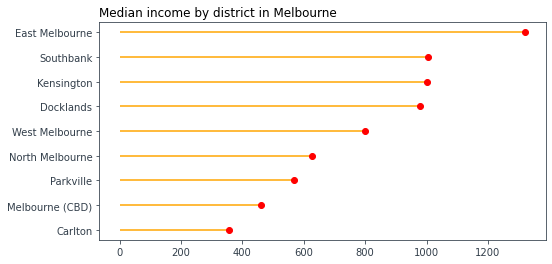

<Figure size 432x288 with 0 Axes>

In [125]:
# bar chart with social data by district
df_income.sort_values(by='median_income', ascending=True, inplace = True)

my_range=range(1,len(df_income.index)+1)
plt.figure(figsize=(8,4))
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=df_income['median_income'], color='orange')
plt.plot(df_income['median_income'], my_range, "o", color='red')
plt.yticks(my_range, df_income['geography'])
plt.title("Median income by district in Melbourne", loc='left')

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'


#df_income.plot.barh(x = 'geography', title = 'Median income by district in Melbourne', 
#                   figsize = (12,8), legend = False)
plt.show()
plt.savefig("income_bar.png")

In [127]:
# Initialize folium map.
map_inc = folium.Map([-37.803999, 144.94648], zoom_start=13, tiles="Stamen Toner")

# Set up Choropleth map
folium.Choropleth(
geo_data=final_df_income,
data=final_df_income,
columns=['geography','median_income'],
key_on="feature.properties.geography",
fill_color='OrRd', #BuPu
fill_opacity=0.7,
line_opacity=0,
legend_name="Median income",
smooth_factor=1,
Highlight= True,
line_color = "blue",
name = "Wills",
show=False,
overlay=False,
nan_fill_color = "White"
).add_to(map_inc)

# Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'red', 
                            'fillOpacity': 0, 
                            'weight': 0.7}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.2, 
                                'weight': 0.8}
NIL = folium.features.GeoJson(
    data = final_df_income,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['geography',"median_income"],
        aliases=['geography',"median_income"],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
map_inc.add_child(NIL)
map_inc.keep_in_front(NIL)
map_inc
map_inc.save('Income_geomap.html')

With regard to the total area considered, the richer areas seems to be on the west and south sides, and are *Kensington*, _Docklands_ and *Southbank*, a part from _East Melbourne_ that is the reachest by far.

#### Education

In [128]:
df_resEdu = df_resid[df_resid['topic'] == 'Residents: Education']

In [129]:
df_education = df_resEdu[(df_resEdu['category'] == 'Non-school qualification: level of education - overview') & 
                        (df_resEdu['year'] == 2016)] 
# year 2016 is assumed to represent most recent data and anyway does not differ much

In [130]:
df_education['sub_category'].unique().tolist()

['Postgraduate Degree Level',
 'Graduate Diploma and Graduate Certificate Level',
 'Bachelor Degree Level',
 'Advanced Diploma and Diploma Level',
 'Certificate Level',
 'Level of education inadequately described',
 'Level of education not stated']

In [131]:
df_education.drop(df_education[(df_education.geography == 'City of Melbourne') | 
                               (df_education.geography == 'Greater Melbourne') | 
                               (df_education.geography == 'South Yarra (inc. Melbourne Remainder)')].index, 
                  axis = 0, inplace = True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [132]:
df_education = df_education[['geography', 'sub_category', 'value']]

In [133]:
df_education.set_index(['geography', 'sub_category'], inplace = True)
df_education = df_education.unstack('sub_category')
df_education = df_education.droplevel(level = 0, axis = 1)
df_education.reset_index(inplace = True)

In [134]:
df_education['tot_resid'] = df_education.sum(axis = 1)#, numeric_only = True)

In [135]:
column_list = list(df_education)
column_list

['geography',
 'Advanced Diploma and Diploma Level',
 'Bachelor Degree Level',
 'Certificate Level',
 'Graduate Diploma and Graduate Certificate Level',
 'Level of education inadequately described',
 'Level of education not stated',
 'Postgraduate Degree Level',
 'tot_resid']

In [136]:
df_education = df_education[['geography',
                             'Graduate Diploma and Graduate Certificate Level',
                             'Postgraduate Degree Level',
                             'Bachelor Degree Level',
                             'Advanced Diploma and Diploma Level',
                             'Certificate Level',
                             'Level of education inadequately described',
                             'Level of education not stated',
                             'tot_resid']]

In [137]:
column_list = list(df_education)
grad_list = column_list[1:4]

In [138]:
df_education['grad_resid'] = df_education[grad_list].sum(axis = 1)

In [139]:
df_educ = df_education.copy()
df_educ['value'] = round(df_education['grad_resid'] / df_education['tot_resid'], 2)

In [140]:
df_educ = df_educ[['geography', 'value']]
df_educ = df_educ.rename(columns = {"value":"graduate_proportion"})

Concerning education, the results are presented in the same way as they were for income. More specifically, with education has been considered the education level of the residents, namely the proportion of population that owns a degree is considered to compare the different areas.

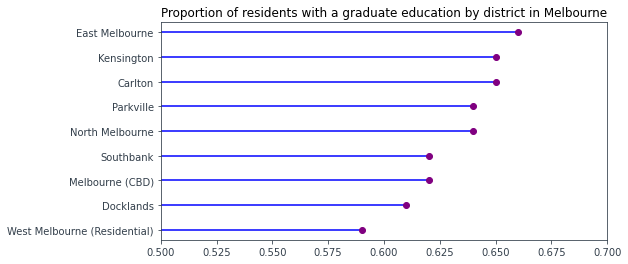

<Figure size 432x288 with 0 Axes>

In [141]:
df_educ.sort_values(by='graduate_proportion', ascending=True, inplace = True)
#df_educ.plot.barh(x = 'geography', title = 'Proportion of residents with a graduate education by district in Melbourne', 
#                 figsize = (12,8), xlim = (0.5,0.7), legend = False)


my_range=range(1,len(df_income.index)+1)
plt.figure(figsize=(8,4))
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=df_educ['graduate_proportion'], color='blue')
plt.plot(df_educ['graduate_proportion'], my_range, "o", color='purple')
plt.yticks(my_range, df_educ['geography'])
plt.xlim(0.5,0.7)
plt.title("Proportion of residents with a graduate education by district in Melbourne", loc='left')

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

plt.show()
plt.savefig("education_bar.png")

As can be seen in the horizontal bar chart above, there is less discrepancy among the areas, also due to the fact that a proportion is considered in this case instead of an absolute value. The more educated is _East Melbourne_, followed by *Kensington* and _Carlton_. Whereas, the least educated is West Melbourne.

In [142]:
# Next, merge education data frame and the geoJSON data frame on geography.
df_educ['geography'].iloc[df_educ['geography'] == 'West Melbourne (Residential)'] = 'West Melbourne'
final_df_education = geoJSON_df.merge(df_educ, on = "geography")
#final_df_education

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [190]:
# Initialize folium map.
map_edu = folium.Map([-37.803999, 144.94648], zoom_start=13, tiles="Stamen Toner")

# Set up Choropleth map
folium.Choropleth(
geo_data=final_df_education,
data=final_df_education,
columns=['geography',"graduate_proportion"],
key_on="feature.properties.geography",
fill_color='BuPu',
fill_opacity=0.7,
line_opacity=0,
legend_name="Proportion of graduates",
smooth_factor=1,
Highlight= True,
line_color = "blue",
name = "Wills",
show=False,
overlay=False,
nan_fill_color = "White"
).add_to(map_edu)

# Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'orange', 
                            'fillOpacity': 0, 
                            'weight': 0.7}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.2, 
                                'weight': 0.8}
NIL = folium.features.GeoJson(
    data = final_df_education,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['geography',"graduate_proportion"],
        aliases=['geography',"graduate_proportion"],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
map_edu.add_child(NIL)
map_edu.keep_in_front(NIL)
map_edu
map_edu.save('Education_geomap.html')

The more educated areas are this time in the Northern part, however, few of them are also among the richest income-wise, i.e. _Kensington_ and *East Melbourne*.

#### Language spoken

In [144]:
df_resEt = df_resid[df_resid['topic'] == 'Residents: Ethnicity']
df_resEt['category'].unique().tolist()

['Indigenous status',
 'Country of birth - overview',
 'Country of birth - detailed',
 'Language spoken at home - detailed',
 'Religious affiliation - overview',
 'Language spoken at home - overview',
 'Proficiency in spoken English',
 'Religious affiliation - detailed']

In [145]:
df_resEt[df_resEt['category'] == 'Proficiency in spoken English']
# not stated proficiency or language is associated to 'not well'
df_resEt[df_resEt['category'] == 'Proficiency in spoken English']['sub_category'].unique().tolist()

['Speaks English only',
 'Speaks other language and speaks English: Very well or well',
 'Speaks other language and speaks English: Not well or not at all',
 'Proficiency in English not stated',
 'Language and proficiency in English not stated']

In [146]:
df_ethnicity = df_resEt[(df_resEt['category'] == 'Proficiency in spoken English') & 
                        (df_resEt['year'] == 2016)] 
# year 2016 is assumed to represent most recent data and anyway does not differ much

In [147]:
df_ethnicity.drop(df_ethnicity[(df_ethnicity.geography == 'City of Melbourne') | 
                               (df_ethnicity.geography == 'Greater Melbourne') | 
                               (df_ethnicity.geography == 'South Yarra (inc. Melbourne Remainder)')].index, 
                  axis = 0, inplace = True)
df_ethnicity = df_ethnicity[['geography', 'sub_category', 'value']]

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [148]:
df_ethnicity.set_index(['geography', 'sub_category'], inplace = True)
df_ethnicity = df_ethnicity.unstack('sub_category')
df_ethnicity = df_ethnicity.droplevel(level = 0, axis = 1)
df_ethnicity.reset_index(inplace = True)

In [149]:
df_ethnicity['tot_resid'] = df_ethnicity.sum(axis = 1)#, numeric_only = True)

In [150]:
column_list = list(df_ethnicity)
column_list

['geography',
 'Language and proficiency in English not stated',
 'Proficiency in English not stated',
 'Speaks English only',
 'Speaks other language and speaks English: Not well or not at all',
 'Speaks other language and speaks English: Very well or well',
 'tot_resid']

In [151]:
# reordering the columns
df_ethnicity = df_ethnicity[['geography',
                             'Language and proficiency in English not stated',
                             'Proficiency in English not stated',
                             'Speaks other language and speaks English: Not well or not at all',
                             'Speaks other language and speaks English: Very well or well',
                             'Speaks English only',
                             'tot_resid']]

In [152]:
column_list = list(df_ethnicity)
eng_list = column_list[4:6]
df_ethnicity['eng_resid'] = df_ethnicity[eng_list].sum(axis = 1)

In [153]:
df_et = df_ethnicity.copy()
df_et['english-speaker_proportion'] = round(df_ethnicity['eng_resid'] / df_ethnicity['tot_resid'], 2)
df_et = df_et[['geography', 'english-speaker_proportion']]

Finally, the last factor is the language spoken, in particular, the level of spoken English is the comparison factor now. People who are native speakers as well as very-well or well speakers, as stated in the census, are taken into account in the proportion, over the total number of residents. 

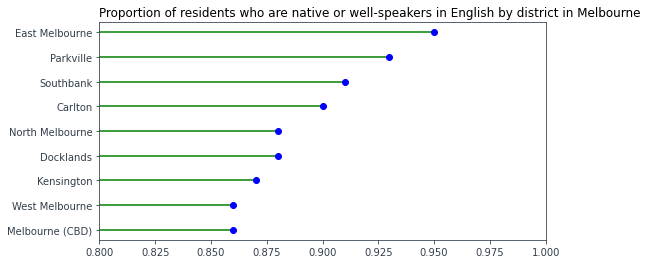

<Figure size 432x288 with 0 Axes>

In [189]:
df_et.sort_values(by='english-speaker_proportion', ascending=True, inplace = True)
#df_et.plot.barh(x = 'geography', title = 'Proportion of residents who are native or well-speakers in English by district in Melbourne', 
#                figsize = (12,8), xlim = (0.8,1), legend = False)

my_range=range(1,len(df_et.index)+1)
plt.figure(figsize=(8,4))
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=df_et['english-speaker_proportion'], color='green')
plt.plot(df_et['english-speaker_proportion'], my_range, "o", color='blue')
plt.yticks(my_range, df_et['geography'])
plt.xlim(0.8,1)
plt.title("Proportion of residents who are native or well-speakers in English by district in Melbourne", loc='left')

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

plt.show()
plt.savefig("ethnicity_bar.png")

_East Melbourne_ is the former again, and it can be argued that is not an unusual result because income, level of education and level of spoken English are somehow demographically connected by the mutual influence they can have on each other. \
Nevertheless, the other areas look more shuffled respect to the previous rankings.  

In [155]:
df_et['geography'].iloc[df_et['geography'] == 'West Melbourne (Residential)'] = 'West Melbourne'
final_df_ethnicity = geoJSON_df.merge(df_et, on = "geography")

# Initialize folium map.
map_ethn = folium.Map([-37.803999, 144.94648], zoom_start=13, tiles="Stamen Toner")

# Set up Choropleth map
folium.Choropleth(
geo_data=final_df_ethnicity,
data=final_df_ethnicity,
columns=['geography',"english-speaker_proportion"],
key_on="feature.properties.geography",
fill_color='YlGnBu', #PuBuGn
fill_opacity=0.7,
line_opacity=0,
legend_name="English speakers or native proportion",
smooth_factor=1,
Highlight= True,
line_color = "blue",
name = "Wills",
show=False,
overlay=False,
nan_fill_color = "White"
).add_to(map_ethn)

# Add hover functionality.
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'orange', 
                            'fillOpacity': 0, 
                            'weight': 0.7}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.2, 
                                'weight': 0.8}
NIL = folium.features.GeoJson(
    data = final_df_ethnicity,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['geography',"english-speaker_proportion"],
        aliases=['geography',"english-speaker_proportion"],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
map_ethn.add_child(NIL)
map_ethn.keep_in_front(NIL)
map_ethn
map_ethn.save('Ethnicity_geomap.html')

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


As shown by also the choropleth map above, best speakers are not all living in a single part of the city. \
It is also worth to mention that the scores of the different areas are quite close to each other. That is because a proportion has still been considered, but also Melbourne is an English-speaking city. Therefore, the fairly big difference in the lengths of the bar chart and in the colors of the maps should serve as a help for the viewer but not be misleading.

## Discussion  
This section contains the discussion for our final project, divided into seperate sections for each part of the data analysis and visualizations.  

**Tree Presentation**  
This section was based on Melbourne's trees data set with more than half of the rows containing null values. Those same rows were populated as much as possible with the mode of the remaining rows with the same name  and planted in the same year. Because of that, the results and conclusions in the analysis might not be entirely correct.


**Life Expectancy of Trees**  
Because the model was trained and evaluated mostly with Australian native trees species, it cant be easily escalated to other cities. 

Due to the dimensionality reduction, we cannot be sure which original feature influences the target variable the most.

**Tree Impact**  
There was not a lot of data available to examine the influence of trees on the temperature because there was only 1 day of which we knew the exact number of trees in Melbourne at that time. Therefore the analysis is not very thorough and it is hard to conclude anything about the influence of trees. To improve the analysis it would be good to make a new Linear Regression model, including historical data about the number of trees and location of trees in Melbourne. However, when there is more data added to the analysis, the same visualizations could be used to show what the relationship is between trees and temperature.

The visualizations about the presence of trees around facilities showed a small difference in numbers of trees around different facility types. The boxplot was a good choice because it clearly shows the differences in tree numbers. 

**Demographic Perspective**  
For this part two data sets have been used, the main one about the tree data and another containing demographic data. The demographic data set is quite thorough and provides many information and the tree data set as well. However, linking the two has not been easy therefore additional data sets might be beneficial for a more precise analysis where a stronger linkage between tree and demography can be shown. Certainly, more advanced visualizations could be used, by using the Bokeh library for instance.

## Contributions
We have all worked together on the project, but the list below shows who took the lead in which part:
* Gian: Genre, Demographic Perspective     
* Maria: Tree Presentation, Life Expectancy of Trees    
* Vera: Motivation, Tree Impact    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2cea1bd8-5ae8-4120-984d-2b372310ffd5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>